In [80]:
import xarray as xr

## Analyze Trial-Level Performance

### Load Data

In [81]:
dset = xr.load_dataset('data/steinmetz_2017-01-07_Muller.nc')
dset

<xarray.Dataset>
Dimensions:             (trial: 554, time: 250, cell: 646,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 10, spike_id: 3367198)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 549 550 551 552 553 554
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 641 642 643 644 645 646
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'ACA' 'ACB' ... 'SCsg' 'VISp'
  * spike_id            (spike_id) int32 1 2 3 4 ... 3367196 3367197 3367198
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 100 0 0 0 50 50 50 25 ... 0 100 0 0 0 0 100
    contrast_right      (trial) int8 100 100 100 100 50 25 ... 100 100 25 50 50
    gocue               (trial) float64 1.093 0.4924 1.0 0.9604 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 -1.0 1.0 1.0 1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.471 2.004 1.287 1.372 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -0.4479 ... 5.013
    spike_time          (spike_id) float32 0.8492 0.9043 0.9581 ... 2.414 2.462
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 646 646 646 646 646
    spike_trial         (spike_id) uint32 1 1 1 1 1 1 ... 554 554 554 554 554
Attributes:
    session_date:  2017-01-07
    mouse:         Muller
    stim_onset:    0.5
    bin_size:      0.01

### Filter out un-active trials ("passive trials")

In [82]:
type(dset)

xarray.core.dataset.Dataset

In [83]:
type(dset['active_trials'])

xarray.core.dataarray.DataArray

In [84]:
trials = dset['trial'].values
trials

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [6]:
# dset.where(dset.active_trials == True)  # don't run, too slow!!!!

In [42]:
dset.sel(trial=dset.trial[dset.active_trials == True])

<xarray.Dataset>
Dimensions:             (trial: 444, time: 250, cell: 646,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 10, spike_id: 3367198)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 439 440 441 442 443 444
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 641 642 643 644 645 646
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'ACA' 'ACB' ... 'SCsg' 'VISp'
  * spike_id            (spike_id) int32 1 2 3 4 ... 3367196 3367197 3367198
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 100 0 0 0 50 50 50 25 ... 100 0 0 0 0 50 50
    contrast_right      (trial) int8 100 100 100 100 50 25 ... 100 100 100 0 50
    gocue               (trial) float64 1.093 0.4924 1.0 ... 0.7356 1.081 0.8364
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 -1.0 1.0 1.0 ... -1.0 1.0 -1.0 -1.0
    feedback_time       (trial) float64 1.471 2.004 1.287 ... 1.337 2.594 2.351
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -0.4479 ... -15.8
    spike_time          (spike_id) float32 0.8492 0.9043 0.9581 ... 2.414 2.462
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 646 646 646 646 646
    spike_trial         (spike_id) uint32 1 1 1 1 1 1 ... 554 554 554 554 554
Attributes:
    session_date:  2017-01-07
    mouse:         Muller
    stim_onset:    0.5
    bin_size:      0.01

In [20]:
df = (
    dset
    .sel(trial=dset.trial[dset.active_trials == True])
    [[
        'contrast_left', 
        'contrast_right', 
        'gocue',
        'stim_onset',
        'feedback_type',
        'feedback_time',
        'response_type',
        'response_time',
        'reaction_type',
        'reaction_time',
        # 'previous_reward',
    ]]
    .to_dataframe()
    # .reset_index()
)
df

,contrast_left,contrast_right,gocue,stim_onset,feedback_type,feedback_time,response_type,response_time,reaction_type,reaction_time
trial,,,,,,,,,,
1,100,100,1.092817,0.5,1.0,1.471223,1.0,1.433916,1.0,360.0
2,0,100,0.492408,0.5,-1.0,2.004432,0.0,2.001066,0.0,inf
3,0,100,1.000416,0.5,1.0,1.286820,-1.0,1.251115,-1.0,200.0
4,0,100,0.960415,0.5,1.0,1.372022,-1.0,1.334219,-1.0,570.0
5,50,50,0.563609,0.5,1.0,0.718411,1.0,0.683368,1.0,240.0
...,...,...,...,...,...,...,...,...,...,...
440,0,100,1.124818,0.5,-1.0,2.642842,0.0,2.631385,0.0,inf
441,0,100,0.691611,0.5,-1.0,2.199235,0.0,2.194355,0.0,inf
442,0,100,0.735612,0.5,1.0,1.336821,-1.0,1.291410,-1.0,1170.0


## Analyze the data!

In [49]:
(df
 [['contrast_left', 'contrast_right']]
 .value_counts(normalize=True)
 .unstack()
 .round(2)
)

contrast_right,0,25,50,100
contrast_left,,,,
0,0.35,0.02,0.07,0.09
25,0.02,0.02,0.03,0.04
50,0.07,0.03,0.04,0.02
100,0.09,0.04,0.03,0.03


In [55]:
df[(df.reaction_type != df.response_type)]

,contrast_left,contrast_right,gocue,stim_onset,feedback_type,feedback_time,response_type,response_time,reaction_type,reaction_time
trial,,,,,,,,,,
21,0,0,0.704011,0.5,1.0,2.244435,0.0,2.214063,1.0,400.0
23,0,100,1.068017,0.5,1.0,2.469639,-1.0,2.434475,1.0,610.0
30,0,50,0.781612,0.5,-1.0,2.292036,0.0,2.286326,-1.0,170.0
33,100,0,1.191619,0.5,-1.0,2.710043,0.0,2.713576,1.0,200.0
38,50,50,0.846413,0.5,1.0,1.469223,-1.0,1.434086,1.0,240.0
...,...,...,...,...,...,...,...,...,...,...
405,50,50,1.066417,0.5,1.0,1.451223,1.0,1.408082,-1.0,880.0
408,0,0,0.731611,0.5,1.0,2.272436,0.0,2.232606,1.0,200.0
413,100,25,0.826013,0.5,-1.0,2.342037,0.0,2.327831,-1.0,70.0


## Performance by Contrast Difference

In [61]:
import seaborn as sns

In [60]:
df['contrast_diff'] = df.contrast_right - df.contrast_left


,contrast_left,contrast_right,gocue,stim_onset,feedback_type,feedback_time,response_type,response_time,reaction_type,reaction_time,contrast_diff
trial,,,,,,,,,,,
1,100,100,1.092817,0.5,1.0,1.471223,1.0,1.433916,1.0,360.0,0
2,0,100,0.492408,0.5,-1.0,2.004432,0.0,2.001066,0.0,inf,100
3,0,100,1.000416,0.5,1.0,1.286820,-1.0,1.251115,-1.0,200.0,100
4,0,100,0.960415,0.5,1.0,1.372022,-1.0,1.334219,-1.0,570.0,100
5,50,50,0.563609,0.5,1.0,0.718411,1.0,0.683368,1.0,240.0,0
...,...,...,...,...,...,...,...,...,...,...,...
440,0,100,1.124818,0.5,-1.0,2.642842,0.0,2.631385,0.0,inf,100
441,0,100,0.691611,0.5,-1.0,2.199235,0.0,2.194355,0.0,inf,100
442,0,100,0.735612,0.5,1.0,1.336821,-1.0,1.291410,-1.0,1170.0,100


c:\Users\delgr\anaconda3\envs\datascience1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


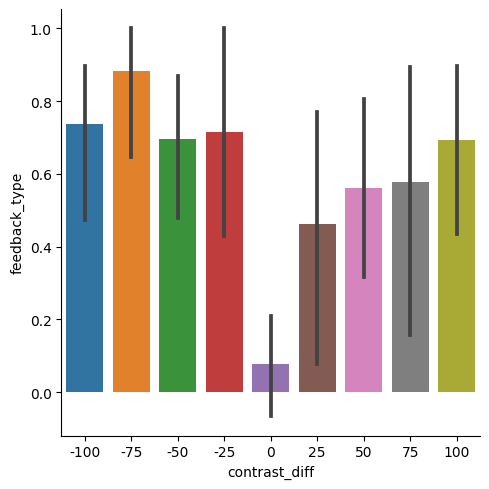

In [70]:
sns.catplot(df, x="contrast_diff", y="feedback_type", kind='bar');

In [ ]:
%pip install --upgrade seaborn

c:\Users\delgr\anaconda3\envs\datascience1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


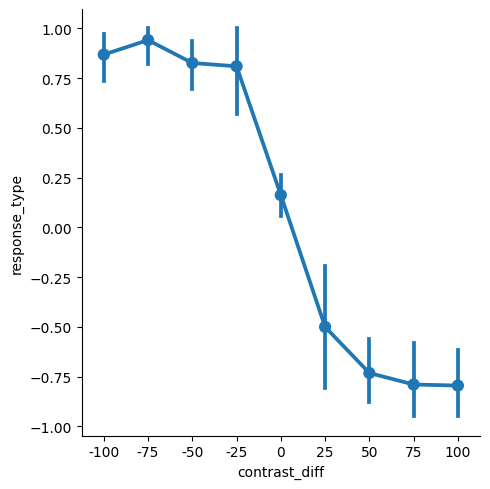

In [79]:
sns.catplot(df, x="contrast_diff", y="response_type", kind='point');